# Masks for FOXSI-2 Target-4

# Check the FOV offset with data

In [8]:
from foxsisim.util import load_rays
from foxsisim.detector import Detector
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
from matplotlib.colors import LinearSegmentedColormap 
import numpy as np
import astropy.io.fits as pyfits

In [9]:
ang = [-82.5000, -75.0000, 67.5000, 75.0000, -97.5000, -90.0000, 60.0000]  ## Detector angles
x,y = 200, 750 ## Target center

In [10]:
tred = {'red' :  ((0.0, 0.0, 1.0), 
                    (1.0, 1.0, 0.0)), 
        'green': ((0.0, 0.0, 0.0), 
                    (1.0, 0.0, 0.0)), 
        'blue':  ((0.0, 0.0, 0.0), 
                    (1.0, 0.0, 0.0)), 
        'alpha': ((0.0, 0.0, 0.0), 
                    (1.0, 1.0, 0.0))}

tgreen = {'red' :  ((0.0, 0.0, 0.0), 
                    (1.0, 0.0, 0.0)), 
        'green': ((0.0, 0.0, 1.0), 
                    (1.0, 1.0, 0.0)), 
        'blue':  ((0.0, 0.0, 0.0), 
                    (1.0, 0.0, 0.0)), 
        'alpha': ((0.0, 0.0, 0.0), 
                    (1.0, 0.9, 0.0))}

txray = {'red' :  ((0.0, 0.0, 0.0), 
                    (1.0, 0.0, 0.0)), 
        'green': ((0.0, 0.0, 0.0), 
                    (1.0, 0.0, 0.0)), 
        'blue':  ((0.0, 0.0, 0.0), 
                    (1.0, 0.0, 0.0)), 
        'alpha': ((0.0, 0.0, 0.0), 
                    (1.0, 0.9, 0.0))}


tred   = LinearSegmentedColormap('tred', tred) 
tgreen = LinearSegmentedColormap('tgreen', tgreen) 
txray = LinearSegmentedColormap('txray', txray) 

In [11]:
T4D6 = pyfits.open('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/T4FOXSI2/T4_Fits/foxsi_T4_d6.fits')

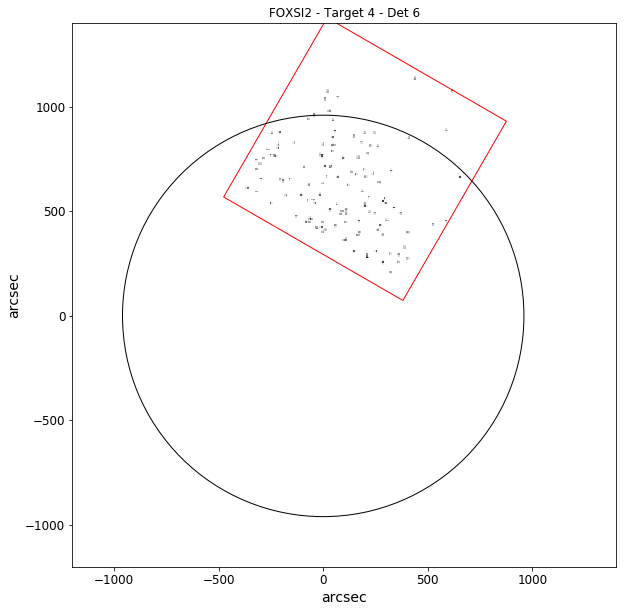

In [13]:
## Plotting
fig, ax = plt.subplots(figsize=(10,10));
## AR1
#plt.scatter(All_Hx,All_Hy,color='red',s=.02,alpha=0.8)
#plt.scatter(All_Px,All_Py,color='blue',s=.02,alpha=0.8)
#plt.scatter(All_Dx,All_Dy,color='green',s=.02,alpha=0.8)
## ornaments
plt.xlim(-1200,1400)
plt.ylim(-1200,1400)
plt.xlabel('arcsec',fontsize=14)
plt.ylabel('arcsec',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('FOXSI2 - Target 4 - Det 6')
## FOXSI2-Data
ax.imshow(T4D6[0].data,origin='lower',cmap=txray,extent=[-402,795,155,1352])
## Pos6 - Si
l = 990
mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[6]-45)) + 1)
my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[6]-135)) + 1)
rect = patches.Rectangle((x-l/2+mx,y-l/2+my),990,990,angle=ang[6],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
circ = patches.Circle((0,0),radius= 960,fill=False);ax.add_patch(circ)
plt.show()

# Check the other detectors

# Test (to be deleted afterwards) to read rays
### Checking that everything is correct before runing a big number of rays

In [1]:
from foxsisim.util import load_rays
from foxsisim.detector import Detector
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
from matplotlib.colors import LinearSegmentedColormap 
import numpy as np
import astropy.io.fits as pyfits

In [2]:
ang = [-82.5000, -75.0000, 67.5000, 75.0000, -97.5000, -90.0000, 60.0000]  ## Detector angles
x,y = 200, 750 ## Target center

In [5]:
Brays = load_rays('/Users/Kamilobu/Desktop/D0AR1.csv')

# Fix little bug in rays:
for ray in Brays:
    ray.hist = ray.hist.tolist()
# Create detector :
detector = Detector(width=40,
                    height=40,
                    normal = [0,0,1],
                    center = [0,0,230], # This is corrected by the detectors-paper distance
                    reso = [1024,1024])
# Detector Catch rays:
detector.catchRays(Brays)
    

Rays from /Users/Kamilobu/Desktop/D0AR1.csv loaded.


In [6]:
All_Hx, All_Hy, All_Px, All_Py, All_Dx, All_Dy = [], [], [], [], [], []

'''Defining D, H, and P rays for each blocker size: '''
Drays = [ray for ray in Brays if (ray.des[2]==230 and ray.bounces ==2 )]
Srays = [ray for ray in Brays if (ray.des[2]==230 and ray.bounces ==1 )]
Hrays = [ray for ray in Brays if (ray.des[2]==230 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
Prays = [ray for ray in Brays if (ray.des[2]==230 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

#sim_scale = 17.18880   # 1cm = 17.4 arcmin
sim_scale = 1031.328   # 1cm = 1031.328 arcsec

#Hyperboloid
Hx, Hy = [], []
for ray in Hrays:
    Hx.append(ray.pos[0]*sim_scale + x)
    Hy.append(ray.pos[1]*sim_scale + y)
All_Hx.append(Hx)
All_Hy.append(Hy)

# Paraboloid
Px, Py = [], []
for ray in Prays:
    Px.append(ray.pos[0]*sim_scale + x)
    Py.append(ray.pos[1]*sim_scale + y)
All_Px.append(Px)
All_Py.append(Py)
        
# Double
Dx, Dy = [], []
for ray in Drays:
    Dx.append(ray.pos[0]*sim_scale + x)
    Dy.append(ray.pos[1]*sim_scale + y)
All_Dx.append(Dx)
All_Dy.append(Dy)

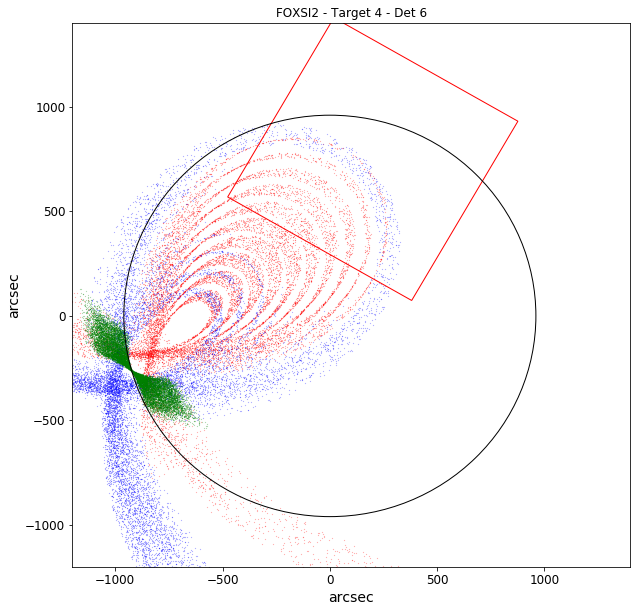

In [7]:
## Plotting
fig, ax = plt.subplots(figsize=(10,10));
## AR1
plt.scatter(All_Hx,All_Hy,color='red',s=.02,alpha=0.8)
plt.scatter(All_Px,All_Py,color='blue',s=.02,alpha=0.8)
plt.scatter(All_Dx,All_Dy,color='green',s=.02,alpha=0.8)
## ornaments
plt.xlim(-1200,1400)
plt.ylim(-1200,1400)
plt.xlabel('arcsec',fontsize=14)
plt.ylabel('arcsec',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('FOXSI2 - Target 4 - Det 6')
## Pos6 - Si
l = 990
mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[6]-45)) + 1)
my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[6]-135)) + 1)
rect = patches.Rectangle((x-l/2+mx,y-l/2+my),990,990,angle=ang[6],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
circ = patches.Circle((0,0),radius= 960,fill=False);ax.add_patch(circ)
plt.show()